In [18]:
!pip install PyTDC
!python -m pip install git+https://github.com/EBjerrum/molvecgen
# might nee


  Cloning https://github.com/EBjerrum/molvecgen to /tmp/pip-req-build-wozrqsam
  Running command git clone -q https://github.com/EBjerrum/molvecgen /tmp/pip-req-build-wozrqsam
  Created wheel for molvecgen: filename=molvecgen-0.1-cp37-none-any.whl size=11374 sha256=801cc6377f6c954e12ed2d024ff097b144198c38fe0e896dd01c1c20a51789c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-16r3g8ds/wheels/9f/95/5c/6b0c37da14d758257f28aba45933dd4500d0f54c0fd4f8cd1a
Successfully built molvecgen
     |████████████████████████████████| 307kB 14.4MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 102kB 6.0MB/s 
     |████████████████████████████████| 552kB 30.0MB/s 
  Created wheel for conda: filename=conda-4.3.16-cp37-none-any.whl size=336938 sha256=2f2c6c8e75dc096b8ee4843acb75609aab2d7bf70b52d9ce37472d7133e1b2d9
  Stored in directory: /root/.cache/pip/wheels/a3/50/79/302742d53e2231ec545cb3791abfdd24de234021ed8e0588a0
  Created wheel for pycosat: filena

In [2]:
import pandas as pd
from tdc.single_pred import ADME
data = ADME(name = 'CYP2C9_Veith')  # this is a  binary classification from structure classificatoin problem
split = data.get_split()

Found local copy...
Loading...
Done!


# Given a smiles string, predict a binary value. 

1. There are 5 version of this problem. 
2. You can experiment with a variety of different ways to approach this problem
3. Write code to understand and break a smiles string in to the relevent consitute parts. 
4. Convert them to an image, then do image classificatoin on them. 
5. if permutes are valid. you can vastly increase your sample size. Feed them into a RNN.


source: https://tdcommons.ai/single_pred_tasks/adme/#cyp3a4-substrate-carbon-mangels-et-al

https://github.com/XinhaoLi74/SmilesPE
Libary to tokenize the smile strings. 
You could merge on https://towardsdatascience.com/find-and-play-with-molecule-datasets-ef1116e4524f


Dataset Description: The CYP P450 genes are involved in the formation and breakdown (metabolism) of various molecules and chemicals within cells. Specifically, the CYP P450 2C9 plays a major role in the oxidation of both xenobiotic and endogenous compounds.

Task Description: Binary Classification. Given a drug SMILES string, predict CYP2C9 inhibition.

Dataset Statistics: 12,092 drugs.

# Notes on conversion

1. Sprase 1 hot tokenized vector. 

2. Other features from the other datasets. Eg take the the Smile String and generate a categoical (some fancy molecule things here) as a feature


3. You can put this into a deep learning model. Or You could feed it into a RNN.

4. If you are successful you have created something of scientific value. 

In [3]:
train = split['train']
print(train.shape)
print(train.head())
print(train.Y.value_counts())


(8465, 3)
     Drug_ID                                               Drug  Y
0   644851.0                   Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1  1
1   644890.0    COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1  1
2   645164.0  CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...  0
3  6602688.0  Br.N=c1n(CCN2CCOCC2)c2ccccc2n1CC(=O)c1ccc(Cl)c...  1
4  5768708.0  COc1ccc(/C(O)=C2/C(=O)C(=O)N(CCCC(=O)O)C2c2ccc...  0
0    5652
1    2813
Name: Y, dtype: int64


## Hist of drug length

count    8465.000000
mean       46.093089
std        19.946480
min         2.000000
25%        35.000000
50%        43.000000
75%        52.000000
max       311.000000
dtype: float64


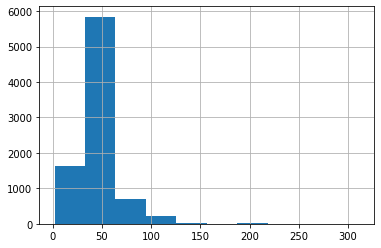

In [ ]:
drugs =train['Drug']

smile_len = pd.Series([len(i) for i in list(drugs)])
print(smile_len.describe())
smile_len.hist()

### Image recognition
1. Comvert drugs to images using one of the various vectorization found here.
  https://github.com/EBjerrum/molvecgen/blob/master/Examples.ipynb
2. There are 4 or 5 SMILE to image that seem promising. 
3. Encode using 1 hot encoding of branches based on https://github.com/XinhaoLi74/SmilesPE.
  There is atom level encoding, and K level encoding. Can very depending on what is valueablue. 
4. RNN with a sliding window of the molecule where each lets say 5 symbols is mapped on to a 1 hot or a categorical. 
  You would first need a way to ensure there is a cardinal ordering, (defined in some way that make sense, unsure what that would be) so that each drug is mapped into that format. Then that is passed as a slinding window into a RNN. 
5. You might find it makes sense to break up the molecules into cateogires and then repreat on of the above for each cateogory. 
6. What is the current accuracy rate for other people's models?
7. Use networkx and from tdc.chem_utils import MolConvert to convert each drug into a graph. 
  https://medium.com/syncedreview/introduction-to-deep-learning-for-graphs-and-where-it-may-be-heading-75d48f42a322
  On doing DL on graph objecst. ( most promising)


  https://www.cheminformania.com/learn-how-to-teach-your-computer-to-see-chemistry-free-chemception-models-with-rdkit-and-keras/
  




In [5]:
#!pip install SmilesPE I already added this into springboard root

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
from SmilesPE.pretokenizer import kmer_tokenizer

smi = 'CC[N+](C)(C)Cc1ccccc1Br'
toks = kmer_tokenizer(smi, ngram=4) # might be useful for RNNs if is ordered. else can permute valid to get more data.
print(toks)

['CC[N+](', 'C[N+](C', '[N+](C)', '(C)(', 'C)(C', ')(C)', '(C)C', 'C)Cc', ')Cc1', 'Cc1c', 'c1cc', '1ccc', 'cccc', 'cccc', 'ccc1', 'cc1Br']


In [10]:

from tdc.chem_utils import MolConvert
converter = MolConvert(src = 'SMILES', dst = 'Graph2D')
mol = converter(['Clc1ccccc1C2C(=C(/N/C(=C2/C(=O)OCC)COCCN)C)\C(=O)OC',
       'CCCOc1cc2ncnc(Nc3ccc4ncsc4c3)c2cc1S(=O)(=O)C(C)(C)C'])

In [26]:
dict_rep = mol[0][0]
graph_rep = mol[0][1]
graph_rep   


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [30]:
import numpy as np
from PIL import Image

img = Image.fromarray(graph_rep, mode='1')
img.show()